有一个csv文件：

```
date,temp,oxygen,NH3,TP,TN,algae,area,weather,max_temperature,min_temperature,aqi,aqiLevel,wind_direction,wind_power,aqiInfo
2021-06-02,26.1875,6.6665,0.025,0.068275,1.07325,14400000.0,无锡,阴-阵雨,26,21,24,1,东南风,4级,优
2021-06-03,25.881666666666664,6.6418333333333335,0.0251166666666666,0.0637833333333333,0.9151666666666666,10867091.666666666,无锡,阴-阵雨,26,19,66,2,西北风,3级,良
2021-06-04,25.895,7.946333333333333,0.025,0.0637833333333333,0.9203333333333332,25498423.33333333,无锡,阴-多云,26,18,51,2,西南风,3级,良
2021-06-05,26.85,9.084,0.025,0.04776,0.9058,21100000.0,无锡,晴,32,19,67,2,西南风,3级,良
2021-06-06,28.256666666666664,9.514333333333331,0.025,0.0440666666666666,0.9233333333333332,15211340.0,无锡,晴,33,19,80,2,南风,3级,良
2021-06-07,27.635,8.3865,0.025,0.0366499999999999,0.7778333333333333,7994458.333333333,无锡,阴-多云,35,21,68,2,东南风,3级,良
2021-06-08,28.19666666666667,8.397499999999999,0.025,0.0418666666666666,0.7323333333333334,12259158.333333334,无锡,阴-多云,30,24,36,1,东南风,3级,优
2021-06-09,28.751666666666665,8.309166666666668,0.025,0.0389833333333333,0.601,6891956.666666667,无锡,阴-雷阵雨,32,24,52,2,东南风,3级,良
2021-06-10,28.741666666666664,7.385833333333333,0.025,0.03785,0.5256666666666666,6301236.666666667,无锡,阴,28,24,38,1,东南风,2级,优
2021-06-11,29.491666666666664,7.6176666666666675,0.025,0.0327666666666666,0.4495,6244151.666666667,无锡,阴-多云,32,23,82,2,东风,2级,良
2021-06-12,29.58666666666667,7.271999999999999,0.025,0.02975,0.3741666666666667,4201731.666666667,无锡,多云-雷阵雨,33,24,41,1,东南风,3级,优
2021-06-13,29.563333333333333,6.929333333333333,0.025,0.0302833333333333,0.2663333333333333,4964940.0,无锡,阴-小雨,28,25,34,1,西南风,2级,优
2021-06-14,29.58833333333333,6.963166666666666,0.025,0.0290666666666666,0.1886666666666666,5394340.0,无锡,阴-小雨,31,25,46,1,东南风,3级,优
2021-06-15,30.21,7.23925,0.025,0.033425,0.396,6927237.5,无锡,阴-小雨,33,24,48,1,西南风,3级,优
2021-06-16,30.316666666666663,7.396833333333333,0.025,0.0366666666666666,0.4708333333333334,7246886.666666667,无锡,阴-雷阵雨,29,23,34,1,东北风,2级,优
2021-06-17,29.68166666666667,7.344333333333334,0.025,0.0371166666666666,0.284,15886050.0,无锡,小雨,26,24,41,1,东南风,2级,优
```



请你用python分析高温、或者持续性高温和藻类的爆发有没有相关性？或者滞后的相关性？如果有滞后相关性的话，这种滞后相关性分别是几天？

请你注意，temp代表水温。max_temperature,min_temperature代表气温，可以不考虑。

最后，需要你绘制几张图。


# 分析水温与藻类数量的相关性

Correlation coefficient between temperature and algae count: -0.01788180142827932
Correlation coefficient with 0-day lag: -0.01788180142827932
Correlation coefficient with 1-day lag: -0.007799727528891753
Correlation coefficient with 2-day lag: -2.6311334080708416e-05
Correlation coefficient with 3-day lag: 0.005857026555707485
Correlation coefficient with 4-day lag: 0.010800783006649196
Correlation coefficient with 5-day lag: 0.015698453763693665
Correlation coefficient with 6-day lag: 0.020764790684351296
Correlation coefficient with 7-day lag: 0.024228965087721998
Correlation coefficient with 8-day lag: 0.026972657412990018
Correlation coefficient with 9-day lag: 0.0289244271116251
Correlation coefficient with 10-day lag: 0.03075908577393397
Correlation coefficient with 11-day lag: 0.03313527058931893
Correlation coefficient with 12-day lag: 0.0346282529843097
Correlation coefficient with 13-day lag: 0.03646578091442002
Correlation coefficient with 14-day lag: 0.03750630823250658
Co

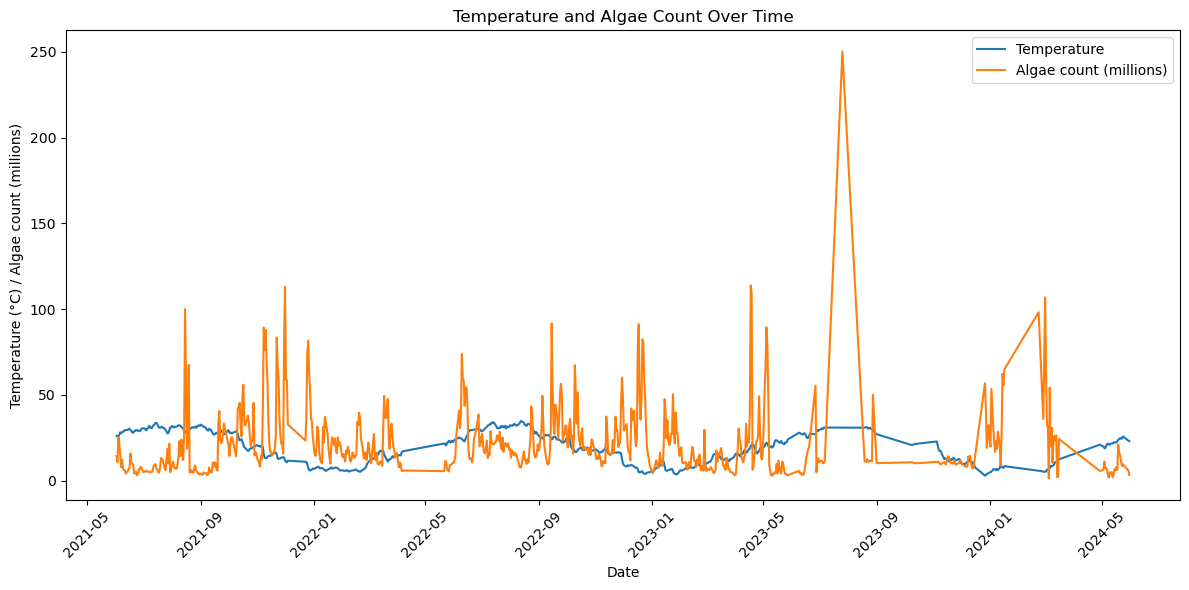

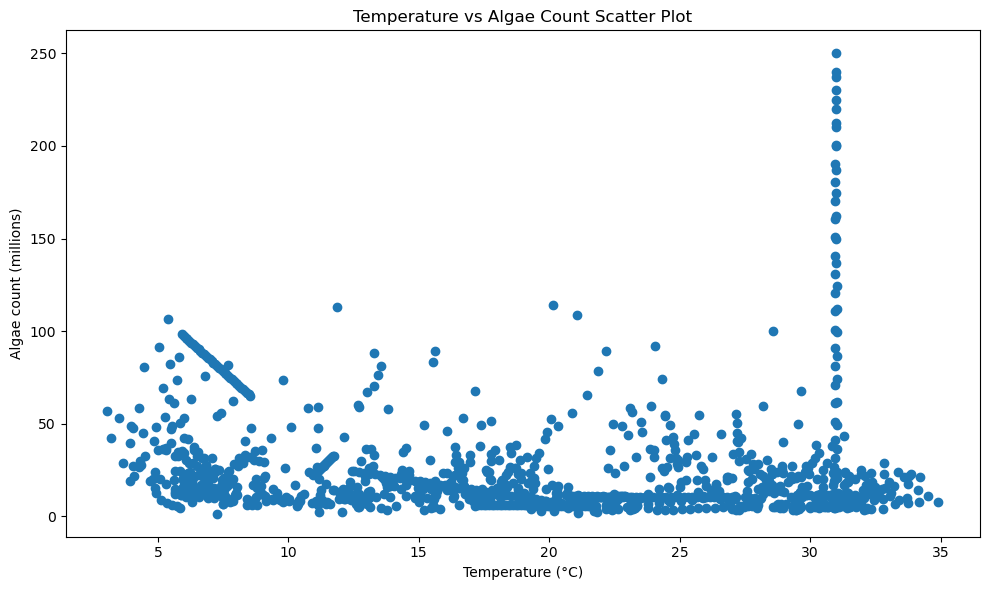

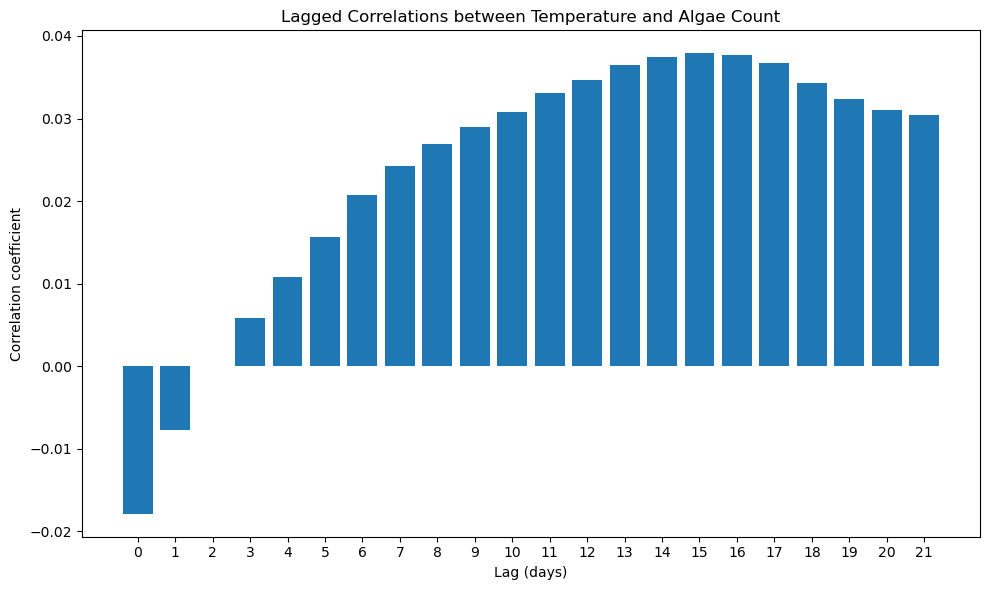

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Read CSV file
df = pd.read_csv('/root/Download/AlgaeBloomForecast/merged_data.csv', parse_dates=['date'])

# Convert 'temp' and 'algae' columns to numeric type
df['temp'] = pd.to_numeric(df['temp'])
df['algae'] = pd.to_numeric(df['algae'])

# Sort by date
df = df.sort_values('date')

# Calculate correlation between temperature and algae count
correlation = df['temp'].corr(df['algae'])
print(f"Correlation coefficient between temperature and algae count: {correlation}")

# Calculate lagged correlations
max_lag = 21
lag_correlations = []

for lag in range(max_lag + 1):
    lag_corr = df['temp'].corr(df['algae'].shift(-lag))
    lag_correlations.append(lag_corr)
    print(f"Correlation coefficient with {lag}-day lag: {lag_corr}")

best_lag = lag_correlations.index(max(lag_correlations))
print(f"Best lag (days): {best_lag}")

# Plot time series of temperature and algae count
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp'], label='Temperature')
plt.plot(df['date'], df['algae'] / 1e6, label='Algae count (millions)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C) / Algae count (millions)')
plt.title('Temperature and Algae Count Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot scatter plot of temperature vs algae count
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['algae'] / 1e6)
plt.xlabel('Temperature (°C)')
plt.ylabel('Algae count (millions)')
plt.title('Temperature vs Algae Count Scatter Plot')
plt.tight_layout()
plt.show()

# Plot lagged correlations
plt.figure(figsize=(10, 6))
plt.bar(range(max_lag + 1), lag_correlations)
plt.xlabel('Lag (days)')
plt.ylabel('Correlation coefficient')
plt.title('Lagged Correlations between Temperature and Algae Count')
plt.xticks(range(max_lag + 1))
plt.tight_layout()
plt.show()